# Chapter 05

## Modules

In [31]:
import numpy as np
import pandas as pd
import ctypes
import time
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Exercises

### R-5.1

Execute the following experiments and compare the results on your system.

In [9]:
n = 50
import sys
data = []
for k in range(n):
    a = len(data)
    b = sys.getsizeof(data)
    print("Length: {0:3d}; Size in bytes: {1:4d}".format(a, b))
    data.append(None)

Length:   0; Size in bytes:   64
Length:   1; Size in bytes:   96
Length:   2; Size in bytes:   96
Length:   3; Size in bytes:   96
Length:   4; Size in bytes:   96
Length:   5; Size in bytes:  128
Length:   6; Size in bytes:  128
Length:   7; Size in bytes:  128
Length:   8; Size in bytes:  128
Length:   9; Size in bytes:  192
Length:  10; Size in bytes:  192
Length:  11; Size in bytes:  192
Length:  12; Size in bytes:  192
Length:  13; Size in bytes:  192
Length:  14; Size in bytes:  192
Length:  15; Size in bytes:  192
Length:  16; Size in bytes:  192
Length:  17; Size in bytes:  264
Length:  18; Size in bytes:  264
Length:  19; Size in bytes:  264
Length:  20; Size in bytes:  264
Length:  21; Size in bytes:  264
Length:  22; Size in bytes:  264
Length:  23; Size in bytes:  264
Length:  24; Size in bytes:  264
Length:  25; Size in bytes:  264
Length:  26; Size in bytes:  344
Length:  27; Size in bytes:  344
Length:  28; Size in bytes:  344
Length:  29; Size in bytes:  344
Length:  3

### R-5.4

Our `DynamicArray` class below does not support use of negative indices with `__getitem__`. Update that method to better match the semantics of a Python list.

In [79]:
class DynamicArray:
    """A dynamic array class akin to a simplified Python list"""
    
    def __init__(self):
        """Create an empty array."""
        self._n = 0
        self._capacity = 1
        self._A = self._make_array(self._capacity)
        
    def __len__(self):
        """Return number of elements stored in the array"""
        return self._n
    
    def __getitem__(self, k):
        if 0<= k < self._n:
            return self._A[k]
        else:
            return self._A[k - 1]
        
    def append(self, obj):
        """Add object to end of the array."""
        if self._n == self._capacity:
            self._resize(2 * self._capacity)
        self._A[self._n] = obj
        self._n += 1
    
    def _resize(self, c):
        """Resize internal array to capacity c."""
        B = self._make_array(c)
        for k in range(self._n):
            B[k] = self._A[k]
        self._A = B
        self._capacity = c
        
    def _make_array(self, c):
        """Return new array with capacity c."""
        return (c * ctypes.py_object)()

In [80]:
darray = DynamicArray()

In [81]:
darray.append(4)
darray.append(1)
darray.append(3)

In [82]:
print(darray[-3])
print(darray[-2])
print(darray[-1])
print(darray[0])
print(darray[1])
print(darray[2])

4
1
3
4
1
3


### R-5.6

Our implementation of inser for the `DynamicArray` class, as given below, has the following inefficiency. in the case when a resize occurs, the resize operation takes time to copy all the elements from an old array to a new array, and then the subsequent loop in the body of `insert` shifts many of those elements. Give an improved implemenation of the `insert` method, so that, in the case of a resize, the elements are shifted into their final position during that operation,m therby avoiding the subsequent shifting.

In [505]:
class DynamicArray:
    """A dynamic array class akin to a simplified Python list"""
    
    def __init__(self):
        """Create an empty array."""
        self._n = 0
        self._capacity = 1
        self._A = self._make_array(self._capacity)
        
    def __len__(self):
        """Return number of elements stored in the array"""
        return self._n
    
    def __getitem__(self, k):
        if 0<= k < self._n:
            return self._A[k]
        else:
            return self._A[k - 1]
        
    def append(self, obj):
        """Add object to end of the array."""
        if self._n == self._capacity:
            self._resize(2 * self._capacity)
        self._A[self._n] = obj
        self._n += 1
    
    def _resize(self, c):
        """Resize internal array to capacity c."""
        B = self._make_array(c)
        for k in range(self._n):
            B[k] = self._A[k]
        self._A = B
        self._capacity = c
        
    def _make_array(self, c):
        """Return new array with capacity c."""
        return (c * ctypes.py_object)()
    
    def insert(self, k, value):
        if self._n == self._capacity:
            self._resize(2 * self._capacity)
        for j in range(self._n, k, -1):
            self._A[j] = self._A[j-1]
        self._A[k] = value
        self._n += 1
    
    def improved_insert(self, k, value):
        if self._n == self._capacity:
            tmp = self._make_array(2 * self._capacity)
            self._capacity *= 2
            tmp[:k] = self._A[:k]
            tmp[k + 1: k + len(self._A[k:]) + 1] = self._A[k:]
            self._A = tmp
        else:
            self._A[k + 1 : self._n + 1] = self._A[k: self._n]
        self._A[k] = value
        self._n += 1

In [506]:
insert_num = [i * 500 for i in range(1, 10)]
time_orig = []
time_impr = []

In [507]:
darray = DynamicArray()
darray.append(4)
darray.append(3)
darray.append(2)
darray.append(1)
darray.append(0)

In [508]:
for trial in insert_num:
    start = time.time()
    for i in range(trial):
        darray.insert(0, -1)
    end = time.time()
    time_orig.append(end-start)

In [509]:
print(time_orig)

[0.05037236213684082, 0.3938136100769043, 1.2738392353057861, 2.974229335784912, 6.091444492340088, 11.64903998374939, 17.139135360717773, 25.954696655273438, 38.57468557357788]


In [510]:
darray = DynamicArray()
darray.append(4)
darray.append(3)
darray.append(2)
darray.append(1)
darray.append(0)

In [511]:
for trial in insert_num:
    start = time.time()
    for i in range(trial):
        darray.improved_insert(0, -1)
    end = time.time()
    time_impr.append(end-start)

In [512]:
print(time_impr)

[0.031148910522460938, 0.28533220291137695, 0.9067752361297607, 2.182908058166504, 4.228068828582764, 7.885552644729614, 11.82724642753601, 19.721515417099, 24.762032985687256]


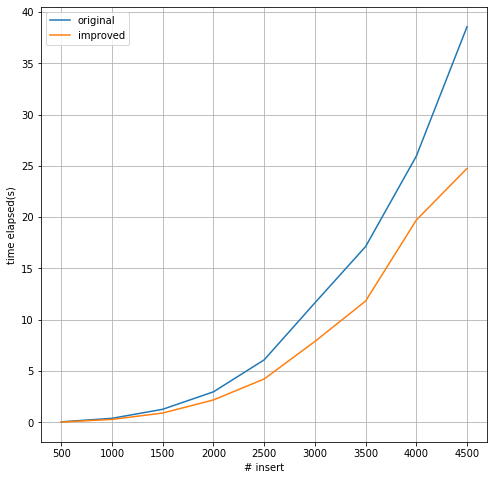

In [518]:
plt.figure(figsize=(8,8))
plt.plot(insert_num, time_orig, label="original")
plt.plot(insert_num, time_impr, label="improved")
plt.legend()
plt.grid()
plt.ylabel('time elapsed(s)')
plt.xlabel('# insert')
plt.show()

### C-5.13

In the experiment of following code, we begin with an empty list. If `ata` were initially constructed with nonempty length, does this affect the sequence of values a which underlying array is expanded? Perform your own experiments, and commnet on any relationship you see between the initial length and the expansion sequence.

In [522]:
n = 30
import sys
data = []
for k in range(n):
    a = len(data)
    b = sys.getsizeof(data)
    print("Length: {0:3d}; Size in bytes: {1:4d}".format(a, b))
    data.append(None)

Length:   0; Size in bytes:   64
Length:   1; Size in bytes:   96
Length:   2; Size in bytes:   96
Length:   3; Size in bytes:   96
Length:   4; Size in bytes:   96
Length:   5; Size in bytes:  128
Length:   6; Size in bytes:  128
Length:   7; Size in bytes:  128
Length:   8; Size in bytes:  128
Length:   9; Size in bytes:  192
Length:  10; Size in bytes:  192
Length:  11; Size in bytes:  192
Length:  12; Size in bytes:  192
Length:  13; Size in bytes:  192
Length:  14; Size in bytes:  192
Length:  15; Size in bytes:  192
Length:  16; Size in bytes:  192
Length:  17; Size in bytes:  264
Length:  18; Size in bytes:  264
Length:  19; Size in bytes:  264
Length:  20; Size in bytes:  264
Length:  21; Size in bytes:  264
Length:  22; Size in bytes:  264
Length:  23; Size in bytes:  264
Length:  24; Size in bytes:  264
Length:  25; Size in bytes:  264
Length:  26; Size in bytes:  344
Length:  27; Size in bytes:  344
Length:  28; Size in bytes:  344
Length:  29; Size in bytes:  344


In [523]:
n = 30
import sys
data = [None] * 10
for k in range(n):
    a = len(data)
    b = sys.getsizeof(data)
    print("Length: {0:3d}; Size in bytes: {1:4d}".format(a, b))
    data.append(None)

Length:  10; Size in bytes:  144
Length:  11; Size in bytes:  208
Length:  12; Size in bytes:  208
Length:  13; Size in bytes:  208
Length:  14; Size in bytes:  208
Length:  15; Size in bytes:  208
Length:  16; Size in bytes:  208
Length:  17; Size in bytes:  208
Length:  18; Size in bytes:  208
Length:  19; Size in bytes:  280
Length:  20; Size in bytes:  280
Length:  21; Size in bytes:  280
Length:  22; Size in bytes:  280
Length:  23; Size in bytes:  280
Length:  24; Size in bytes:  280
Length:  25; Size in bytes:  280
Length:  26; Size in bytes:  280
Length:  27; Size in bytes:  280
Length:  28; Size in bytes:  360
Length:  29; Size in bytes:  360
Length:  30; Size in bytes:  360
Length:  31; Size in bytes:  360
Length:  32; Size in bytes:  360
Length:  33; Size in bytes:  360
Length:  34; Size in bytes:  360
Length:  35; Size in bytes:  360
Length:  36; Size in bytes:  360
Length:  37; Size in bytes:  360
Length:  38; Size in bytes:  448
Length:  39; Size in bytes:  448


In [524]:
n = 30
import sys
data = [None] * 20
for k in range(n):
    a = len(data)
    b = sys.getsizeof(data)
    print("Length: {0:3d}; Size in bytes: {1:4d}".format(a, b))
    data.append(None)

Length:  20; Size in bytes:  224
Length:  21; Size in bytes:  296
Length:  22; Size in bytes:  296
Length:  23; Size in bytes:  296
Length:  24; Size in bytes:  296
Length:  25; Size in bytes:  296
Length:  26; Size in bytes:  296
Length:  27; Size in bytes:  296
Length:  28; Size in bytes:  296
Length:  29; Size in bytes:  296
Length:  30; Size in bytes:  376
Length:  31; Size in bytes:  376
Length:  32; Size in bytes:  376
Length:  33; Size in bytes:  376
Length:  34; Size in bytes:  376
Length:  35; Size in bytes:  376
Length:  36; Size in bytes:  376
Length:  37; Size in bytes:  376
Length:  38; Size in bytes:  376
Length:  39; Size in bytes:  376
Length:  40; Size in bytes:  472
Length:  41; Size in bytes:  472
Length:  42; Size in bytes:  472
Length:  43; Size in bytes:  472
Length:  44; Size in bytes:  472
Length:  45; Size in bytes:  472
Length:  46; Size in bytes:  472
Length:  47; Size in bytes:  472
Length:  48; Size in bytes:  472
Length:  49; Size in bytes:  472


From the test above, it seems the initial length of a list not only affects the sequence of expanding values but also confirms that Python's list does not rely on simple arithmetic or geometric progression while expanding the size of it.

### C-5.16

Implement a `pop` method for the `DynamicArray` class, that removes the last element of the array, and that shrinks the capacity, $N$, of the array by half any time the number of elements in the array goes below $N/4$.

In [2]:
class DynamicArray:
    """A dynamic array class akin to a simplified Python list"""
    
    def __init__(self):
        """Create an empty array."""
        self._n = 0
        self._capacity = 1
        self._A = self._make_array(self._capacity)
        
    def __len__(self):
        """Return number of elements stored in the array"""
        return self._n
    
    def __getitem__(self, k):
        if 0<= k < self._n:
            return self._A[k]
        else:
            return self._A[k - 1]
        
    def append(self, obj):
        """Add object to end of the array."""
        if self._n == self._capacity:
            self._resize(2 * self._capacity)
        self._A[self._n] = obj
        self._n += 1
    
    def _resize(self, c):
        """Resize internal array to capacity c."""
        B = self._make_array(c)
        for k in range(self._n):
            B[k] = self._A[k]
        self._A = B
        self._capacity = c
        
    def _make_array(self, c):
        """Return new array with capacity c."""
        return (c * ctypes.py_object)()
    
    def insert(self, k, value):
        if self._n == self._capacity:
            self._resize(2 * self._capacity)
        for j in range(self._n, k, -1):
            self._A[j] = self._A[j-1]
        self._A[k] = value
        self._n += 1
        
    def pop(self):
        value = x._A[self._n - 1]
        x._A[self._n - 1] = None
        self._n -= 1
        if self._n < 0.25 * self._capacity:
            print("Reducing capacity from {} to {}".format(self._capacity, int(0.5 * self._capacity)))
            self._resize(int(0.5 * self._capacity))        
        return value

In [3]:
x = DynamicArray()
for i in range(200):
    x.append(i)

In [4]:
print(len(x))
print(x._capacity)

200
256


In [5]:
for i in range(192):
    x.pop()

Reducing capacity from 256 to 128
Reducing capacity from 128 to 64
Reducing capacity from 64 to 32


In [6]:
print(len(x))
print(x._capacity)

8
32


### C-5.17

Prove that when using a dynamic array that grows and shrinks as in the previous exercise, the following series of $2n$ operation takes $O(n)$ time: $n$ append operations on an initially empty array, followed by $n$ pop operations.

In [59]:
insert_num = [i * 1000 for i in range(1, 300)]
elapsed = list()
for i in insert_num:
    start = time.time()
    x = DynamicArray()
    for i in range(i):
        x.append(i)
    for i in range(i):
        x.append(i)
    end = time.time()
    elapsed.append(end-start)

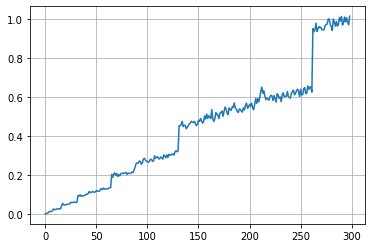

In [60]:
plt.plot(elapsed)
plt.grid()

We can see intermittent surges at some points, which must be the time when resizing happens. However, overall elapsed time follows $O(n)$, which shows why ***amortization analysis*** makes sense.

### C-5.22

Develop an experiment to compare the relative efficiency of the `extend` method of Python's `list` class versus using repeated calls to `append` to accomplish the equivalent task.

In [93]:
x, y = [], []
time_x, time_y = [], []

test_num = list(map(int, [1e5, 2e5, 3e5, 4e5, 5e5]))
for i in test_num:
    
    tba = list(range(i))
    
    start = time.time()
    for i in tba:
        x.append(i)
    end = time.time()
    time_x.append(end-start)


    start = time.time()
    x.extend(tba)
    end = time.time()
    time_y.append(end-start)

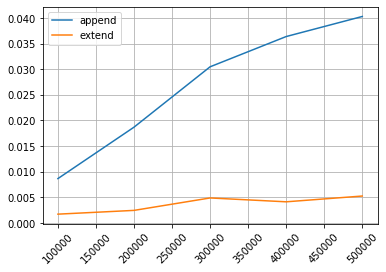

In [95]:
plt.plot(test_num, time_x, label='append')
plt.plot(test_num, time_y, label='extend')
plt.legend()
plt.xticks(rotation=45)
plt.grid()

The method `extend` is a lot faster. This deferent lies on the number of resizing the dynamic list. With a call to `extend`, at most one resize operation will be performed, in constrast to `append`, which will perform resizing multiple times.

### C-5.23

Based on the discussion on constructing new list (list comprehension vs repeatedly appending), develop an experiment to compare the efficiency of Python's list comprehension syntax versus the construction of a list by means of repeated calls to append.

In [99]:
x, y = [], []
time_x, time_y = [], []

test_num = list(map(int, [1e6, 2e6, 3e6, 4e6, 5e6]))
for i in test_num:
    
    start = time.time()
    for k in range(i):
        x.append(k * k)
    end = time.time()
    time_x.append(end-start)

    start = time.time()
    x = [k * k for k in range(i)]
    end = time.time()
    time_y.append(end-start)

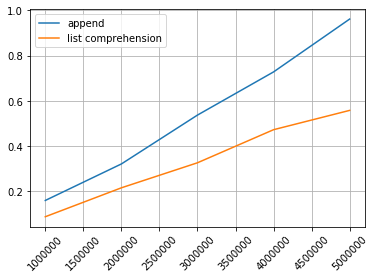

In [101]:
plt.plot(test_num, time_x, label='append')
plt.plot(test_num, time_y, label='list comprehension')
plt.legend()
plt.xticks(rotation=45)
plt.grid()

### C-5.24 

Perform experiments to evaluate the efficiency of the `remove` method of Python's `list` class. Use known values so that all removals occur either at the beginning, middle, or end of the list.

### P-5.34

Write a program that can perform the Caesar cipher for English message that include bot h upper- and lowercase characters

In [102]:
class CaesarCipher:
    """Class for doing encryption and decrpytion using a Caesar cipher."""
    
    def __init__(self, shift):
        """Construct Caesar cipher using given integer shift for rotation."""
        encoder = [None] * 26
        decoder = [None] * 26
        for k in range(26):
            encoder[k] = chr((k + shift) % 26 + ord('A'))
            decoder[k] = chr((k - shift) % 26 + ord('A'))
        self._forward = ''.join(encoder)
        self._backward = ''.join(decoder)
    
    def encrpyt(self, message):
        """Return string representing encripted message."""
        return self._transform(message, self._forward)
    
    def decrpyt(self, secret):
        """Return decrpyted message given encrpyted secret."""""
        return self._transform(secret, self._backward)
    
    def _transform(self, original, code):
        """Utility to perform transformation based on given code string."""""
        msg = list(original)
        for k in range(len(msg)):
            if msg[k].isupper():
                j = ord(msg[k]) - ord('A')
                msg[k] = code[j]
            elif msg[k].islower():
                j = ord(msg[k]) - ord('a')
                msg[k] = code[j]
        return ''.join(msg)

Sample:

In [103]:
cipher = CaesarCipher(3)
message = "TEST MESSAGE GO, lower case"

In [104]:
coded = cipher.encrpyt(message)
coded

'WHVW PHVVDJH JR, ORZHU FDVH'

In [105]:
answer = cipher.decrpyt(coded)
answer

'TEST MESSAGE GO, LOWER CASE'